# 读取数据

In [1]:
import pandas as pd

df = pd.read_csv('data/pure_MS2_merged.csv')
df = df.drop('Metal', axis=1)
df

,CR,IR,Lms,D,Morphology,SSA,Dap,Rct,Molarity,Cation,Anion,CD,Cs
0,1.39,1.15,2.56,5.89,1,64.8,7.5,0.5,2.0,1,1,1.0,431.82
1,1.39,1.15,2.56,5.89,1,64.8,7.5,0.5,2.0,1,1,2.0,398.88
2,1.39,1.15,2.56,5.89,1,64.8,7.5,0.5,2.0,1,1,3.0,312.18
3,1.39,1.15,2.56,5.89,1,64.8,7.5,0.5,2.0,1,1,5.0,272.00
4,1.39,1.15,2.56,5.89,1,64.8,7.5,0.5,2.0,1,1,7.0,230.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.54,0.69,2.41,6.15,2,21.1,NaN,3.1,1.0,3,3,1.0,129.20
188,1.54,0.69,2.41,6.15,2,21.1,NaN,3.1,1.0,3,3,1.5,115.10
189,1.54,0.69,2.41,6.15,2,21.1,NaN,3.1,1.0,3,3,3.0,102.30
190,1.54,0.69,2.41,6.15,2,21.1,NaN,3.1,1.0,3,3,5.0,92.00


# pearson相关系数

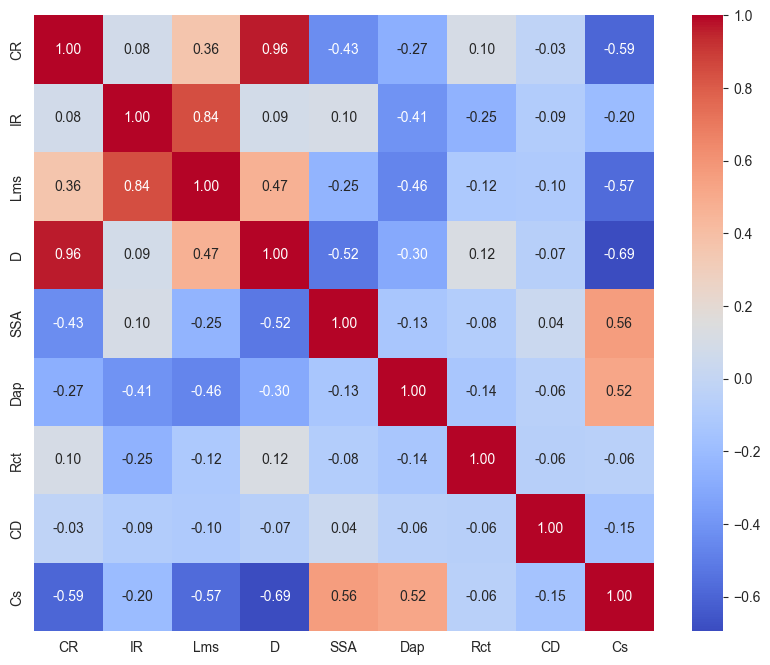

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cor = df.drop(['Morphology', 'Molarity', 'Cation', 'Anion'], axis=1)
# Assuming df is already loaded as per the provided context
# Step 2: Compute the correlation matrix
correlation_matrix = df_cor.corr()

# Step 3: (Optional) Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.savefig('output/figures/pearson_corr.png', dpi=300, bbox_inches='tight')

plt.show()

图中表明特征CR和D,IR和Lms有很强的相关性，因此我们可以删除其中一个特征。

In [3]:
df_1 = df_cor.drop(['IR', 'D'], axis=1)
df_1

,CR,Lms,SSA,Dap,Rct,CD,Cs
0,1.39,2.56,64.8,7.5,0.5,1.0,431.82
1,1.39,2.56,64.8,7.5,0.5,2.0,398.88
2,1.39,2.56,64.8,7.5,0.5,3.0,312.18
3,1.39,2.56,64.8,7.5,0.5,5.0,272.00
4,1.39,2.56,64.8,7.5,0.5,7.0,230.70
...,...,...,...,...,...,...,...
187,1.54,2.41,21.1,NaN,3.1,1.0,129.20
188,1.54,2.41,21.1,NaN,3.1,1.5,115.10
189,1.54,2.41,21.1,NaN,3.1,3.0,102.30
190,1.54,2.41,21.1,NaN,3.1,5.0,92.00


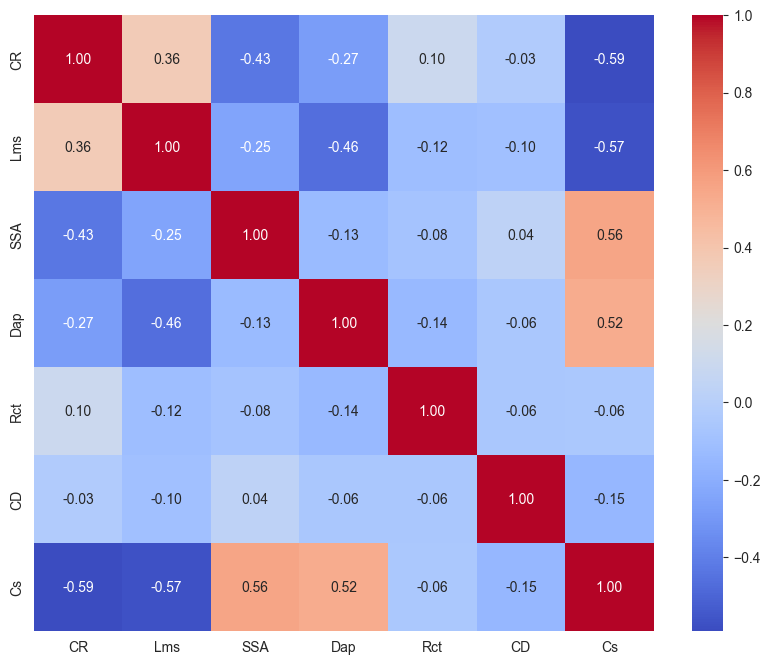

In [4]:
correlation_matrix = df_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [5]:
df_2 = df.drop(['IR', 'D'], axis=1)
df_2.to_csv('data/pure_MS2_pearson.csv', index=False)
df_2

,CR,Lms,Morphology,SSA,Dap,Rct,Molarity,Cation,Anion,CD,Cs
0,1.39,2.56,1,64.8,7.5,0.5,2.0,1,1,1.0,431.82
1,1.39,2.56,1,64.8,7.5,0.5,2.0,1,1,2.0,398.88
2,1.39,2.56,1,64.8,7.5,0.5,2.0,1,1,3.0,312.18
3,1.39,2.56,1,64.8,7.5,0.5,2.0,1,1,5.0,272.00
4,1.39,2.56,1,64.8,7.5,0.5,2.0,1,1,7.0,230.70
...,...,...,...,...,...,...,...,...,...,...,...
187,1.54,2.41,2,21.1,NaN,3.1,1.0,3,3,1.0,129.20
188,1.54,2.41,2,21.1,NaN,3.1,1.0,3,3,1.5,115.10
189,1.54,2.41,2,21.1,NaN,3.1,1.0,3,3,3.0,102.30
190,1.54,2.41,2,21.1,NaN,3.1,1.0,3,3,5.0,92.00
